<a href="https://colab.research.google.com/github/ksy3432/ai-class-DL-Application-/blob/main/DLA_week_1_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# 1. 전복 데이터를 이용하여 머신러닝 5가지 분류 수행(SVM, LR, RF, DT, KNN)

In [22]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

In [23]:
# from google.colab import drive
# drive.mount('/content/drive')

import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

df = pd.read_csv("/content/drive/MyDrive/abalone.csv", index_col=0)
df
# df.columns

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
id,,,,,,,,,
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9


Text(0.5, 1.0, 'abalone ring count')

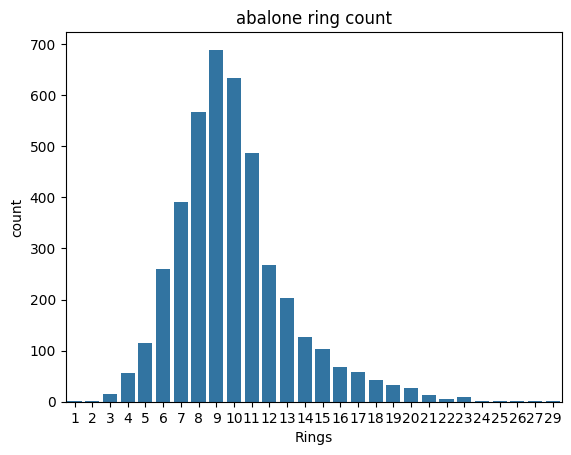

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

df.columns
# 레이블 갯수 확인 (그래프)
sns.countplot(data = df, x="Rings")
plt.xlabel("Rings")
plt.ylabel("count")
plt.title("abalone ring count")

In [4]:
# 결측치 확인
df.isnull().sum()

,0
Sex,0
Length,0
Diameter,0
Height,0
Whole_weight,0
Shucked_weight,0
Viscera_weight,0
Shell_weight,0
Rings,0


In [35]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

# 범주형 변수와 수치형 변수 구분
categorical_features = ['Sex']
numerical_features = ['Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight', 'Viscera_weight', 'Shell_weight']

# 전처리 파이프라인 설정
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),  # 수치형 데이터 표준화
        ('cat', OneHotEncoder(), categorical_features)  # 범주형 데이터 원핫 인코딩
    ])

# 데이터 전처리
X = df.drop(['Rings'], axis=1)
y = df['Rings']

X_processed = preprocessor.fit_transform(X)

X_train_val, X_test, y_train_val, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2

print("훈련 세트 크기:", X_train.shape)
print("검증 세트 크기:", X_val.shape)
print("테스트 세트 크기:", X_test.shape)


훈련 세트 크기: (2505, 10)
검증 세트 크기: (836, 10)
테스트 세트 크기: (836, 10)


In [29]:
# 레이블 갯수 확인 (숫자)
df['Rings'].value_counts()

,count
Rings,
9,689
10,634
8,568
11,487
7,391
12,267
6,259
13,203
14,126


In [9]:
# 결측치 제거
df = df.dropna()
df.isnull().sum()

,0
Sex_0,0
Sex_1,0
Length,0
Diameter,0
Height,0
Whole_weight,0
Shucked_weight,0
Viscera_weight,0
Shell_weight,0
Rings,0


<ipython-input-10-3ca54f9dcc94>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Length'], kde = True, hist = False, ax=ax1)
<ipython-input-10-3ca54f9dcc94>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Diameter'], ax=ax2)


<Axes: xlabel='Diameter', ylabel='Density'>

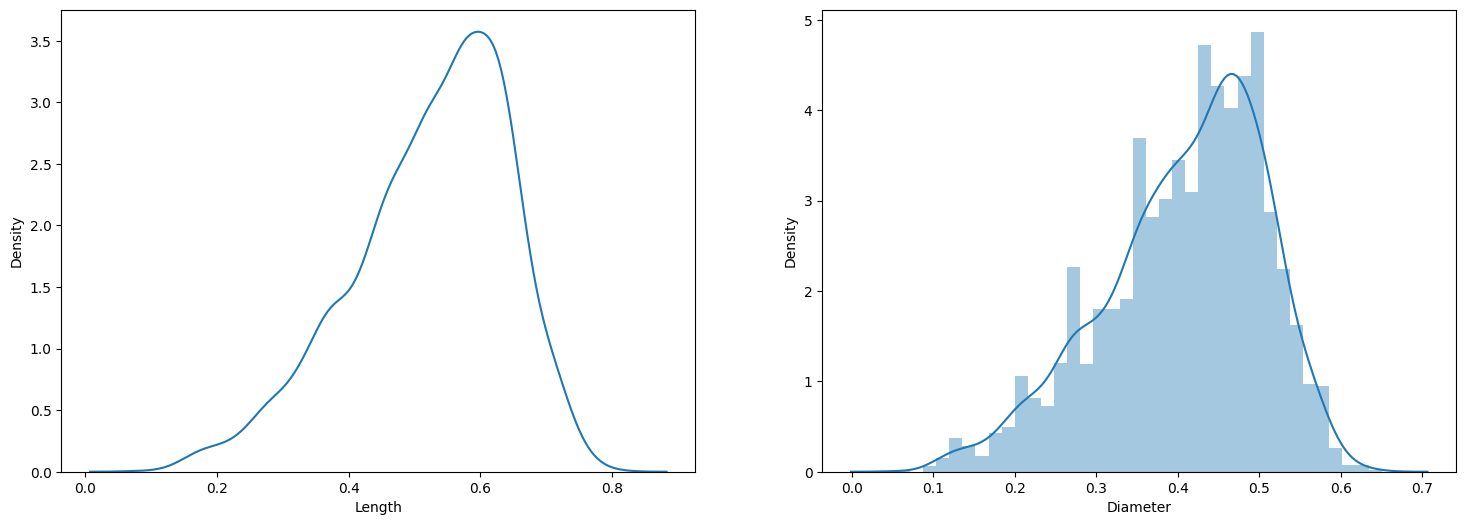

In [10]:
# 컬럼별 히스토그램 확인
# 'legnth'와'diameter' 칼럼을 선택

figure = plt.figure(figsize=(18,6))
ax1 = plt.subplot(1,2,1)
sns.distplot(df['Length'], kde = True, hist = False, ax=ax1)
ax2 = plt.subplot(1,2,2)
sns.distplot(df['Diameter'], ax=ax2)

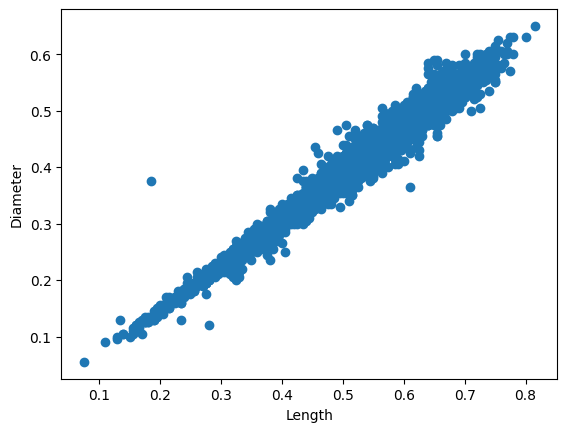

In [ ]:
# 산점도 확인

import matplotlib.pyplot as plt
import numpy as np

plt.scatter(df['Length'], df['Diameter'])
plt.xlabel('Length')
plt.ylabel('Diameter')

plt.show()

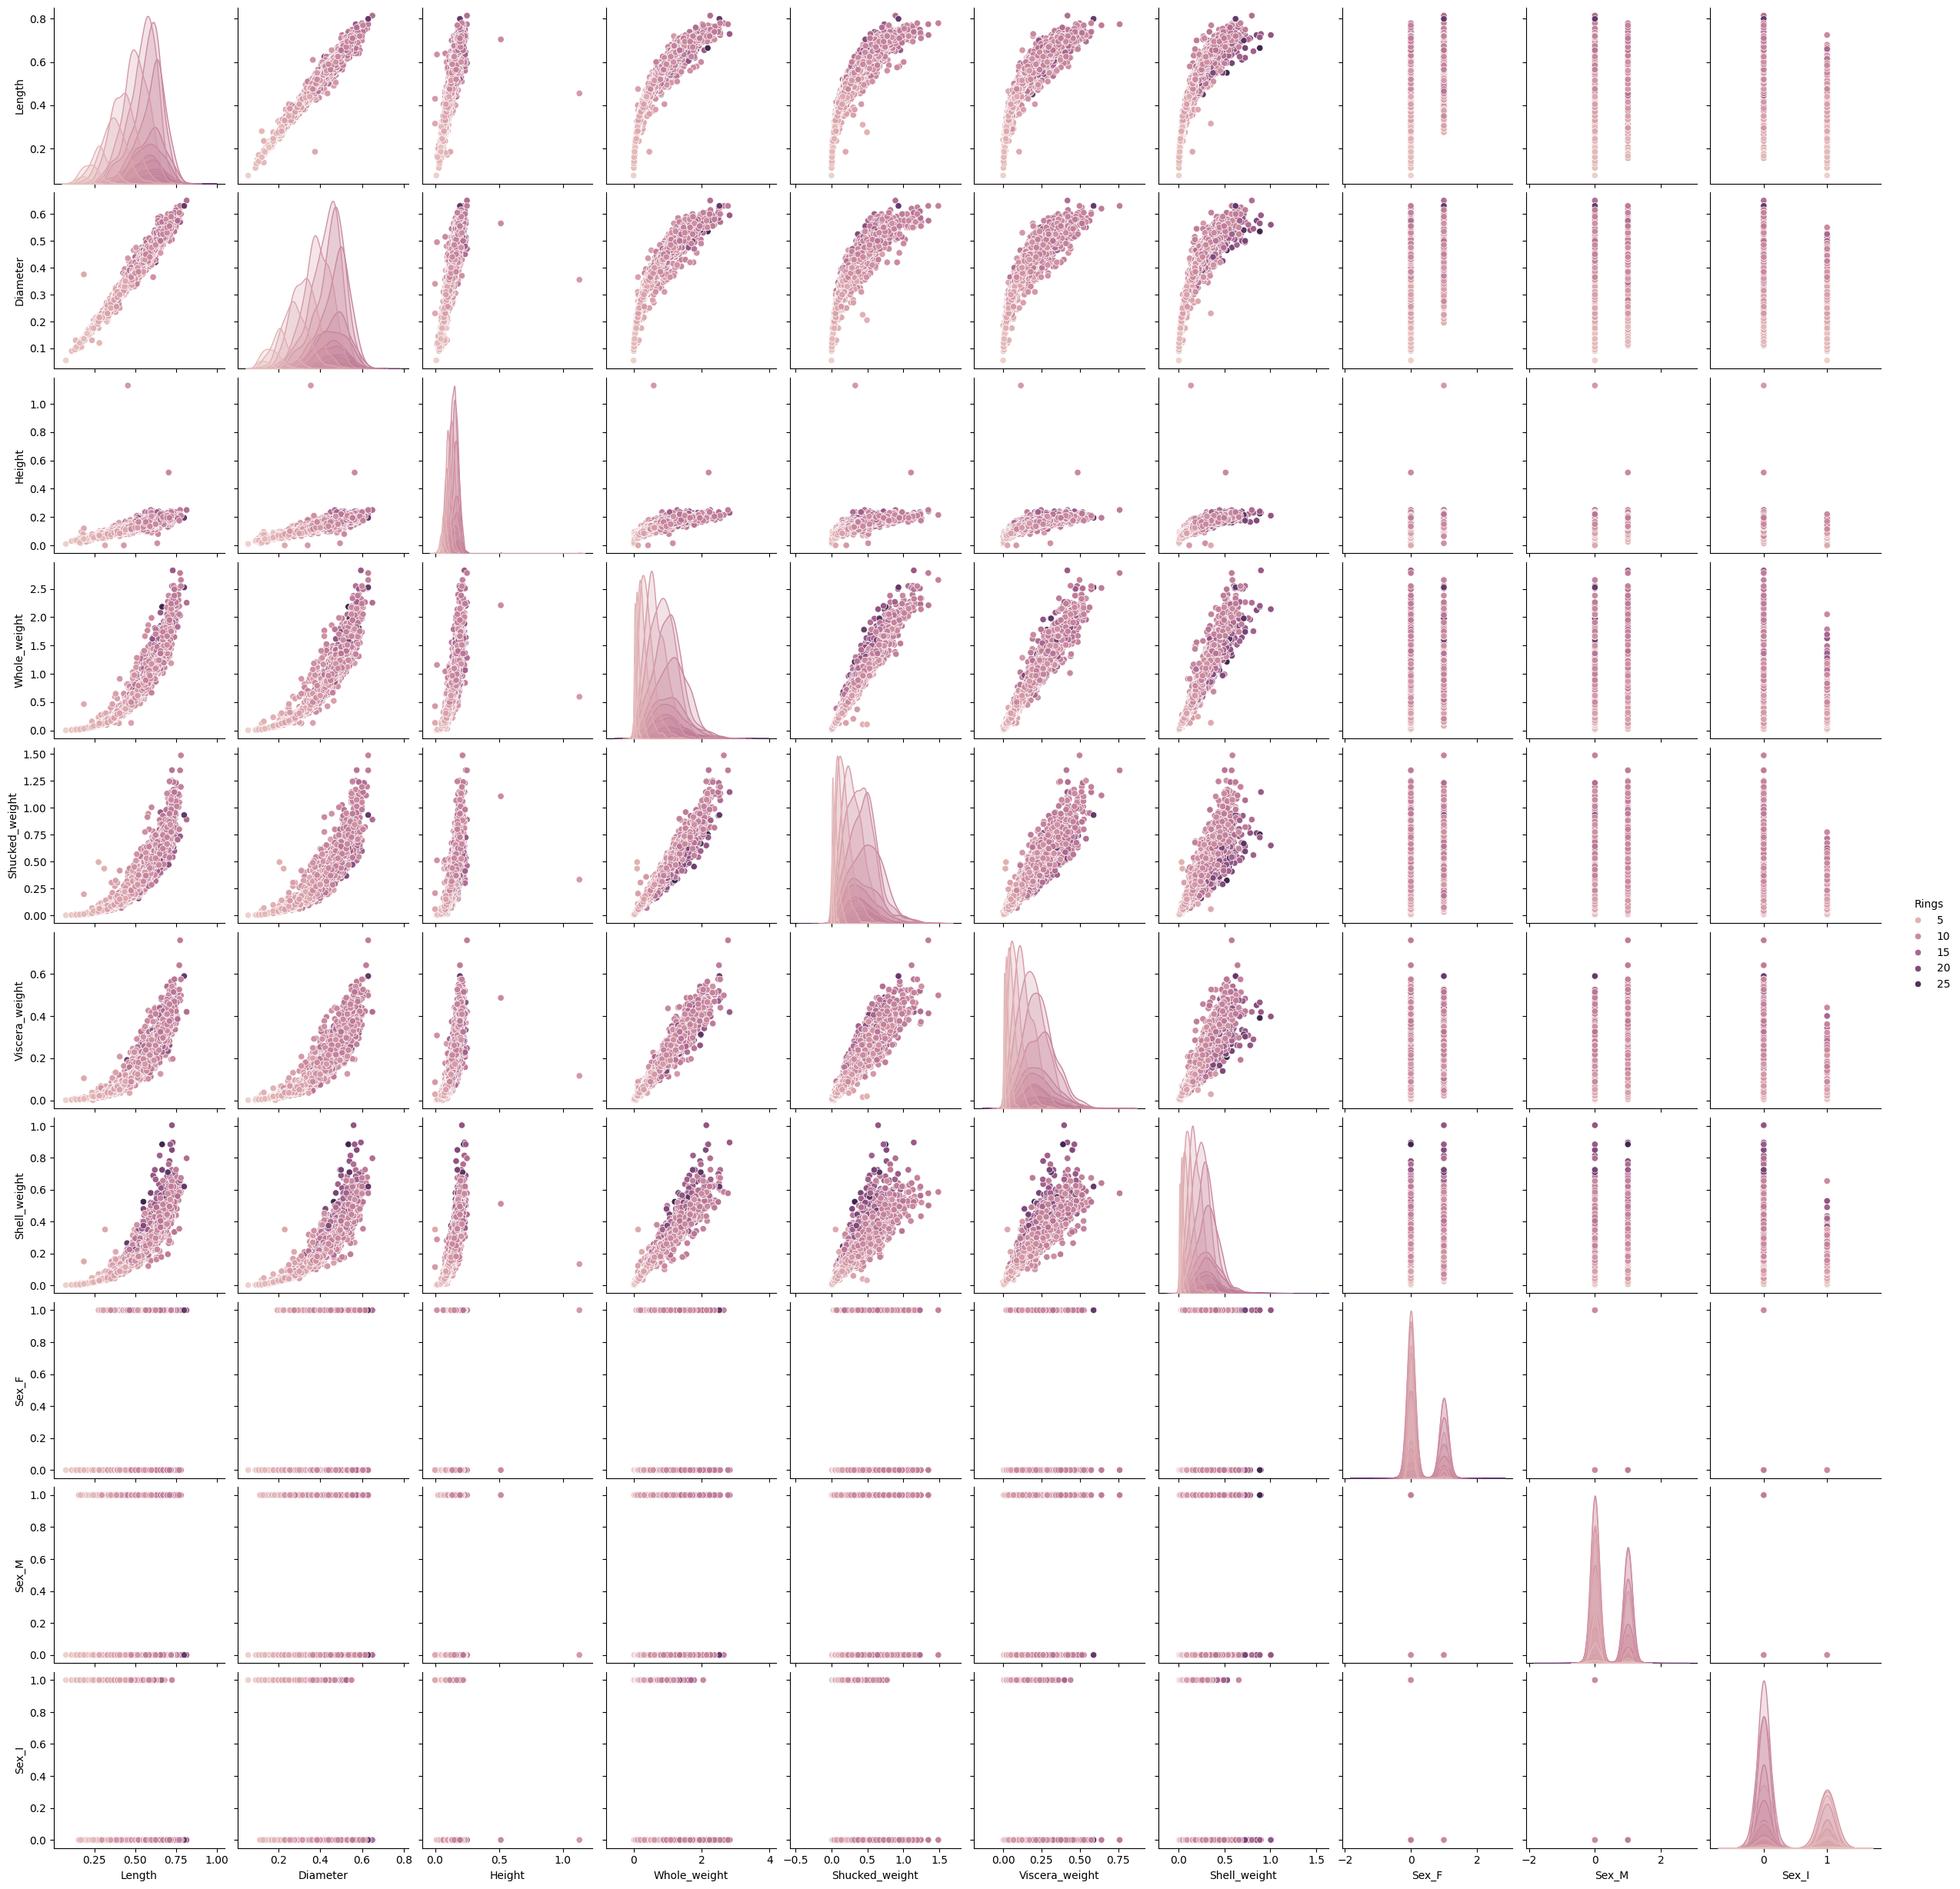

In [11]:
# pairplot를 사용해 각 상관관계 살펴보기

sns.pairplot(df,
             vars=['Length',	'Diameter',	'Height','Whole_weight',	'Shucked_weight',	'Viscera_weight',	'Shell_weight', 'Sex_F','Sex_M','Sex_I'],
            hue ='Rings')
plt.show()

<ipython-input-19-ffdea3b4eaa5>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Length", data=df, palette="Set3")


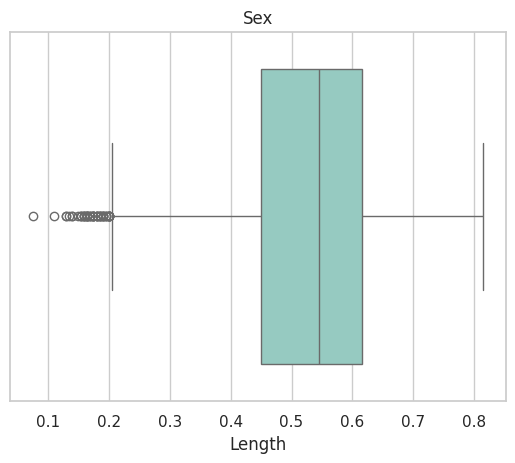

In [ ]:
# 특정 칼럼의 범위 확인 및 outlier 확인

sns.set_theme(style="whitegrid")
sns.boxplot(x="Length", data=df, palette="Set3")
plt.title("Sex")
plt.show()

<ipython-input-11-59f636b60fdc>:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax = ax)


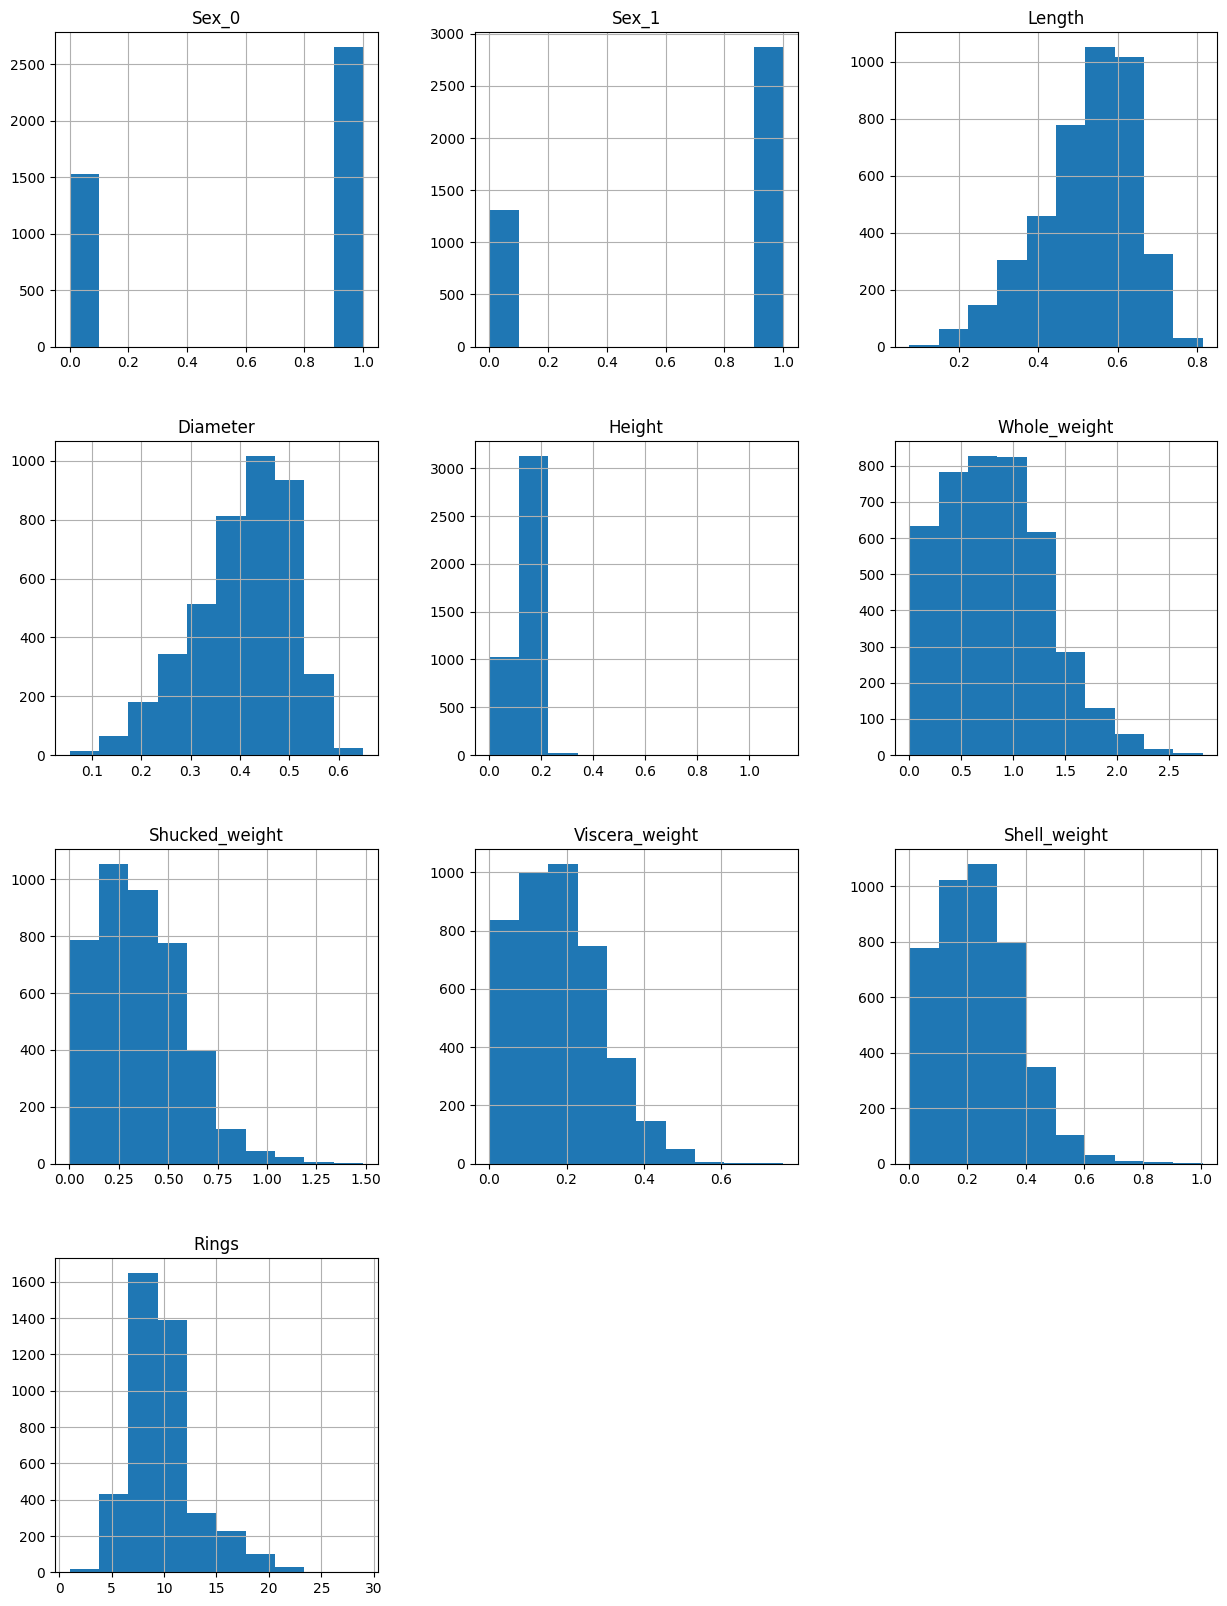

In [11]:
# 각 컬럼별 히스토 그램 확인

fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df.hist(ax = ax)
plt.show()

In [13]:
X=df.drop('Rings',axis=1)
X.head()

,Sex_0,Sex_1,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
id,,,,,,,,,
0,0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,0,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,1,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,0,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,1,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


In [14]:
df

,Sex_0,Sex_1,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
id,,,,,,,,,,
0,0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,0,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,1,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,0,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,1,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...,...
4172,1,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,0,1,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,0,1,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9


In [15]:
y=df['Rings']
y.value_counts()

,count
Rings,
9,689
10,634
8,568
11,487
7,391
12,267
6,259
13,203
14,126


In [ ]:
print ("==================================")
print (" ACCURACY OF OTHER ML CLASSIFIERS" )
print ("==================================")

 ACCURACY OF OTHER ML CLASSIFIERS


In [31]:
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [41]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

def categorize_rings(rings):
    if rings <= 8:
        return 0  # 클래스 0
    elif 9 <= rings <= 10:
        return 1  # 클래스 1
    else:
        return 2  # 클래스 2

# Rings 컬럼에 범주형 변환 적용
y_categorized = df['Rings'].apply(categorize_rings)

# 데이터 전처리 및 분할 (이전과 동일한 방식)
X_processed = preprocessor.fit_transform(X)

# 데이터를 훈련+검증 세트와 테스트 세트로 나누기
X_train_val, X_test, y_train_val, y_test = train_test_split(X_processed, y_categorized, test_size=0.2, random_state=42)

# 훈련+검증 세트를 훈련 세트와 검증 세트로 나누기
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2


clf_svm = SVC(random_state=0)
clf_svm.fit(X_train, y_train)

pred_svm = clf_svm.predict(X_test)

print("\n--- SVM Classifier ---")
print(accuracy_score(y_test, pred_svm))
print(confusion_matrix(y_test, pred_svm))



--- SVM Classifier ---
0.6495215311004785
[[215  49  15]
 [ 52 124 105]
 [ 16  56 204]]


In [42]:
# Build a logistic regression classifier and predict

clf_lr = LogisticRegression(random_state=0)
clf_lr.fit(X_train, y_train)

pred_lr = clf_lr.predict(X_test)

print ("\n--- Logistic Regression Classifier ---")
print (accuracy_score(y_test, pred_lr))
print (confusion_matrix(y_test, pred_lr))


--- Logistic Regression Classifier ---
0.6471291866028708
[[220  47  12]
 [ 62 123  96]
 [ 18  60 198]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [43]:
clf_nn = MLPClassifier(random_state=0)
clf_nn.fit(X_train, y_train)

pred_nn = clf_nn.predict(X_test)

print ("\n--- Neural Network Classifier ---")
print (accuracy_score(y_test, pred_nn))
print (confusion_matrix(y_test, pred_nn))


--- Neural Network Classifier ---
0.645933014354067
[[217  45  17]
 [ 58 119 104]
 [ 13  59 204]]


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [44]:
# Build a decision tree classifier and predict

clf_dt = DecisionTreeClassifier(random_state=0)
clf_dt.fit(X_train, y_train)

pred_dt = clf_dt.predict(X_test)

print ("\n--- Decision Tree Classifier ---")
print (accuracy_score(y_test, pred_dt))
print (confusion_matrix(y_test, pred_dt))


--- Decision Tree Classifier ---
0.5669856459330144
[[194  64  21]
 [ 59 112 110]
 [ 23  85 168]]


In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

print ("\n--- Radom Forest ---")
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
print(accuracy_score(y_test,pred))
print (confusion_matrix(y_test, pred))


--- Radom Forest ---
0.6399521531100478
[[222  49   8]
 [ 50 115 116]
 [ 17  61 198]]


# 2. 딥러닝 수행하기

In [47]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

In [48]:
import tensorflow as tf
from tensorflow import keras

df = pd.read_csv("/content/drive/MyDrive/abalone.csv", index_col=0)
df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
id,,,,,,,,,
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9


In [49]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight',
       'Viscera_weight', 'Shell_weight', 'Rings'],
      dtype='object')

Text(0.5, 1.0, 'Ring')

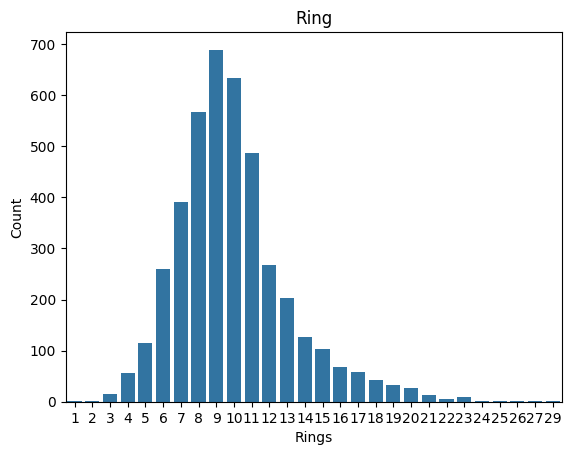

In [51]:
# 레이블 갯수 확인 (그래프)
sns.countplot(data = df, x="Rings")
plt.xlabel("Rings")
plt.ylabel("Count")
plt.title("Ring")

In [52]:
df['Rings'].value_counts()

,count
Rings,
9,689
10,634
8,568
11,487
7,391
12,267
6,259
13,203
14,126


In [53]:
df.isnull().sum()

,0
Sex,0
Length,0
Diameter,0
Height,0
Whole_weight,0
Shucked_weight,0
Viscera_weight,0
Shell_weight,0
Rings,0


In [54]:
# 범주형 변수와 수치형 변수 구분
categorical_features = ['Sex']
numerical_features = ['Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight', 'Viscera_weight', 'Shell_weight']

# 전처리 파이프라인 설정
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),  # 수치형 데이터 표준화
        ('cat', OneHotEncoder(), categorical_features)  # 범주형 데이터 원핫 인코딩
    ])

In [55]:
df = df.dropna()
df.isnull().sum()

,0
Sex,0
Length,0
Diameter,0
Height,0
Whole_weight,0
Shucked_weight,0
Viscera_weight,0
Shell_weight,0
Rings,0


<Axes: xlabel='Length', ylabel='Density'>

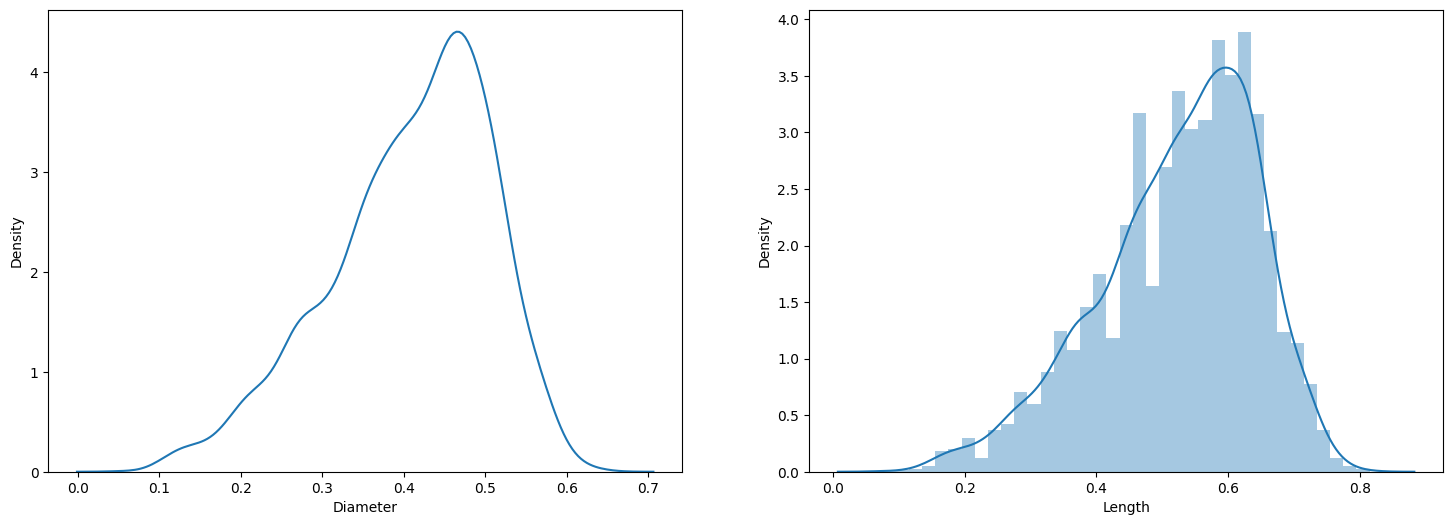

In [58]:
# 컬럼별 히스토그램 확인

figure = plt.figure(figsize=(18,6))
ax1 = plt.subplot(1,2,1)
sns.distplot(df['Diameter'], kde = True, hist = False, ax=ax1)
ax2 = plt.subplot(1,2,2)
sns.distplot(df['Length'], ax=ax2)

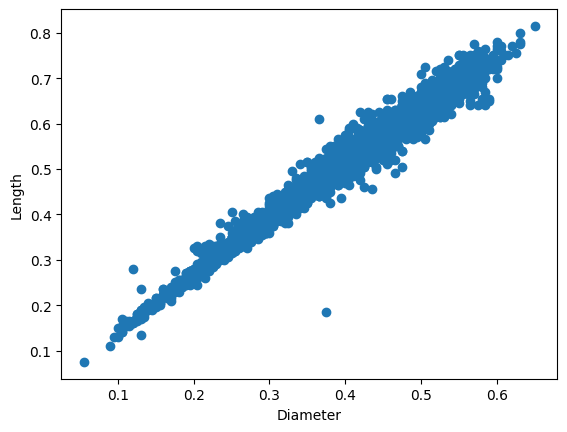

In [59]:
# 산점도 확인

import matplotlib.pyplot as plt
import numpy as np

plt.scatter(df['Diameter'], df['Length'])
plt.xlabel('Diameter')
plt.ylabel('Length')

plt.show()

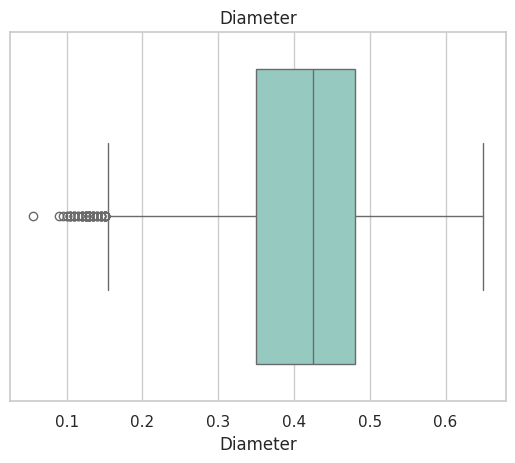

In [62]:
# 특정 칼럼의 범위 확인 및 outlier 확인

sns.set_theme(style="whitegrid")
sns.boxplot(x="Diameter", data=df, palette="Set3")
plt.title("Diameter")
plt.show()

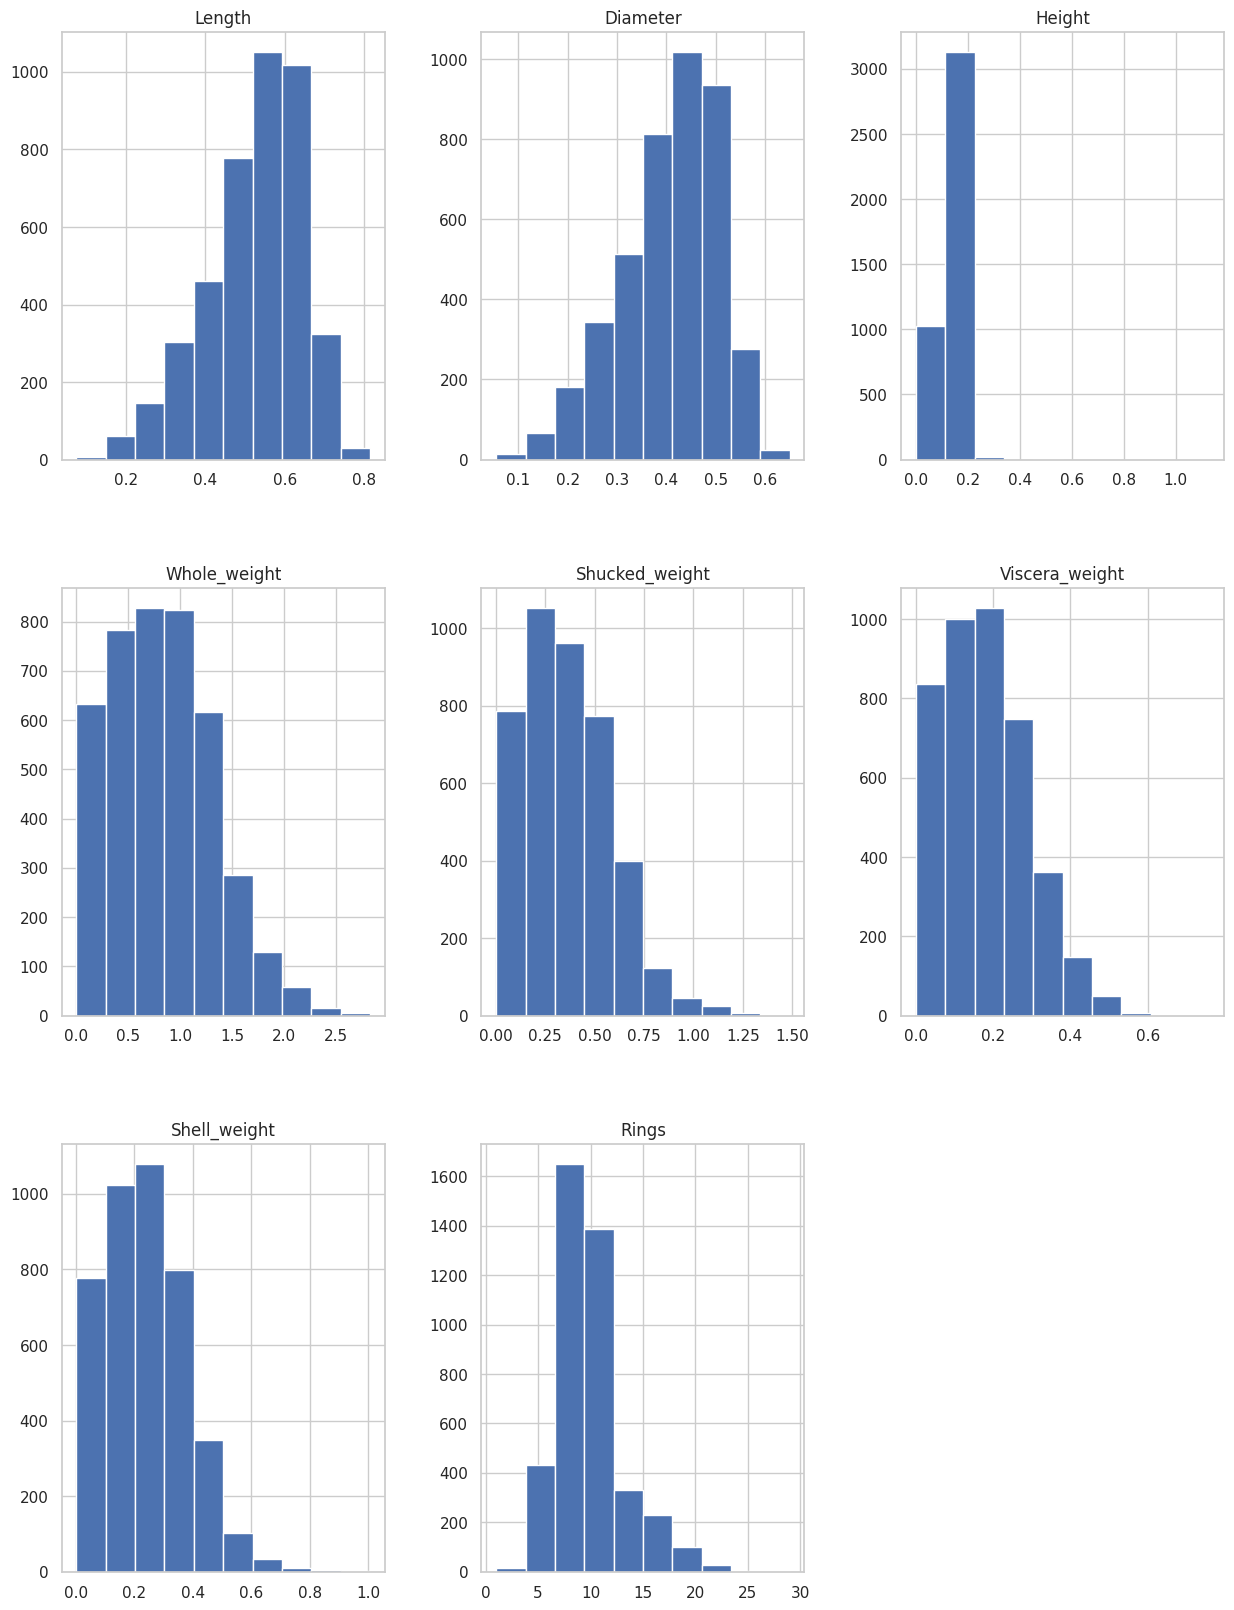

In [63]:
# 각 컬럼별 히스토 그램 확인

fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df.hist(ax = ax)
plt.show()

In [74]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

# 범주형 변수와 수치형 변수 구분
categorical_features = ['Sex']
numerical_features = ['Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight', 'Viscera_weight', 'Shell_weight']

# 전처리 파이프라인 설정
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),  # 수치형 데이터 표준화
        ('cat', OneHotEncoder(), categorical_features)  # 범주형 데이터 원핫 인코딩
    ])

# 데이터에서 설명 변수와 타겟 변수 분리
X = df.drop(['Rings'], axis=1)
y = df['Rings']

# Rings를 분류 문제로 설정하기 위해 범주형 변환
def categorize_rings(rings):
    if rings <= 10:
        return 0  # 클래스 0
    else:
        return 1  # 클래스 1

# Rings 컬럼에 범주형 변환 적용
y_categorized = df['Rings'].apply(categorize_rings)

# 데이터 전처리 및 분할
X_processed = preprocessor.fit_transform(X)

# OneHotEncoder를 사용하여 y_categorized를 원핫 인코딩
onehot_encoder = OneHotEncoder(sparse=False)
y_onehot = onehot_encoder.fit_transform(y_categorized.values.reshape(-1, 1))

# 데이터를 훈련+검증 세트와 테스트 세트로 나누기
X_train_val, X_test, y_train_val, y_test = train_test_split(X_processed, y_onehot, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_24 (Dense)                     │ (None, 16)                  │             176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 4)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 2)                   │              10 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 358 (1.40 KB)

 Trainable params: 358 (1.40 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/40
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.5606 - loss: 0.6808 - val_accuracy: 0.7022 - val_loss: 0.5554
Epoch 2/40
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7126 - loss: 0.5580 - val_accuracy: 0.7261 - val_loss: 0.5171
Epoch 3/40
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7510 - loss: 0.5181 - val_accuracy: 0.7428 - val_loss: 0.4995
Epoch 4/40
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7522 - loss: 0.5006 - val_accuracy: 0.7548 - val_loss: 0.4845
Epoch 5/40
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7788 - loss: 0.4700 - val_accuracy: 0.7560 - val_loss: 0.4765
Epoch 6/40
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7617 - loss: 0.4852 - val_accuracy: 0.7620 - val_loss: 0.4746
Epoch 7/40
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7618 - loss: 0.4729 - val_accuracy: 0.7632 - val_loss: 0.4729
Epoch 8/40
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7754 - loss: 0.4686 - val_accuracy: 0.7656 - val_loss

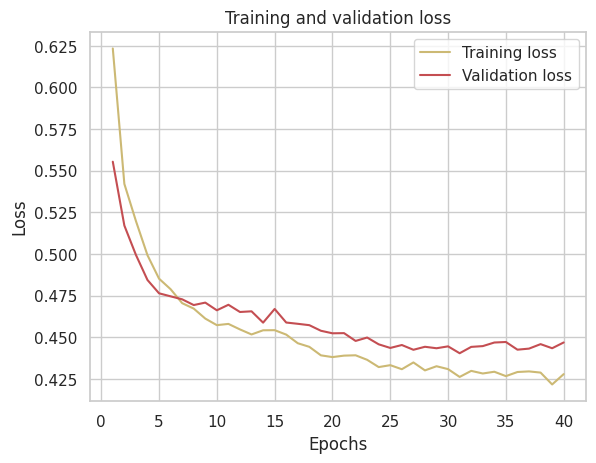

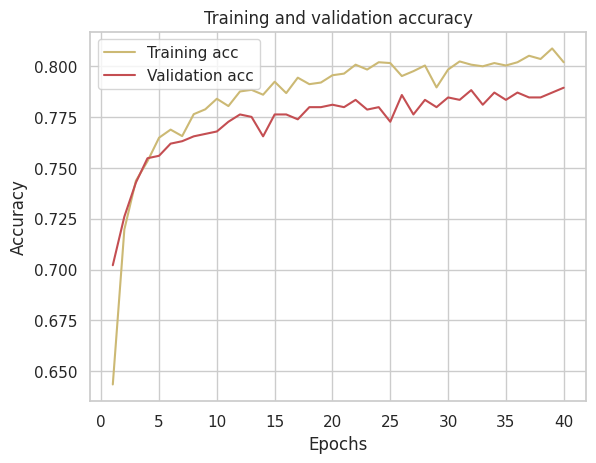

In [75]:
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam
from keras.layers import Dropout
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

#Defining the model

model = keras.Sequential([
    layers.Dense(16,input_dim=X_train.shape[1],activation='tanh'),
    layers.Dense(8,activation='tanh'),
    Dropout(0.2),
    # layers.Dense(8,activation='tanh'),
    layers.Dense(4,activation='tanh'),
    # Dropout(0.2),
    layers.Dense(2,activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

model_history=model.fit(x=X_train, y=y_train, epochs=40, batch_size=64,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

#loss
loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#accuracy
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#3.  Rings를 삭제하고 Diameter를 예측하는 회귀를 수행하라.

In [76]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats  # 과학용 계산 라이브러리

In [77]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

df = pd.read_csv("/content/drive/MyDrive/abalone.csv", index_col=0)
df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
id,,,,,,,,,
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [90]:
X1 = df.drop('Diameter',axis=1)
X = X1.drop('Rings',axis=1)
X.head()

,Sex,Length,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
id,,,,,,,
0,M,0.455,0.095,0.5140,0.2245,0.1010,0.150
1,M,0.350,0.090,0.2255,0.0995,0.0485,0.070
2,F,0.530,0.135,0.6770,0.2565,0.1415,0.210
3,M,0.440,0.125,0.5160,0.2155,0.1140,0.155
4,I,0.330,0.080,0.2050,0.0895,0.0395,0.055


In [109]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

# 범주형 변수와 수치형 변수 구분
categorical_features = ['Sex']
numerical_features = ['Length', 'Height', 'Whole_weight', 'Shucked_weight', 'Viscera_weight', 'Shell_weight']

# 전처리 파이프라인 설정
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),  # 수치형 데이터 표준화
        ('cat', OneHotEncoder(), categorical_features)  # 범주형 데이터 원핫 인코딩
    ])

X_processed = preprocessor.fit_transform(X)

In [115]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 'Rings' 열을 삭제하고, 'Diameter'를 타겟 변수로 설정
y_regression_diameter = df['Diameter'].values  # 'Diameter'를 타겟 변수로 설정
X_features = df.drop(['Diameter'], axis=1)  # 'Diameter'와 'id' 열을 제외한 나머지 특성만 사용

# 범주형 변수와 수치형 변수 구분 (Diameter 제외)
categorical_features_diameter = ['Sex']
numerical_features_diameter = ['Length', 'Height', 'Whole_weight', 'Shucked_weight', 'Viscera_weight', 'Shell_weight', 'Rings']

# 전처리 파이프라인 설정
preprocessor_diameter = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features_diameter),  # 수치형 데이터 표준화
        ('cat', OneHotEncoder(), categorical_features_diameter)  # 범주형 데이터 원핫 인코딩
    ])

# 데이터 전처리
X_processed_for_diameter = preprocessor_diameter.fit_transform(X_features)

# 데이터를 훈련+검증 세트와 테스트 세트로 나누기
X_train_val, X_test, y_train_val, y_test = train_test_split(X_processed_for_diameter, y_regression_diameter, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

In [94]:
y = df['Diameter']
y.head()

,Diameter
id,
0,0.365
1,0.265
2,0.420
3,0.365
4,0.255


In [106]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X_processed,
                                                  y,
                                                  test_size=0.2,
                                                  shuffle=True,
                                                  random_state=12)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(3341, 9) (3341,)
(836, 9) (836,)


In [107]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X_train, y_train)
ly_preds = model.predict(X_test)

print('평균제곱근오차', mean_squared_error(ly_preds, y_test))

def mse_np(actual, predicted):
    return np.mean((np.array(actual) - np.array(predicted)) ** 2)

print('평균제곱근오차', mse_np(ly_preds, y_test))

def mse(actual, predicted):
    sum_square_error = sum((a - p) ** 2 for a, p in zip(actual, predicted))
    mean_square_error = sum_square_error / len(actual)
    return mean_square_error

print('평균제곱근오차', mse(ly_preds, y_test))

평균제곱근오차 0.0002192633005239111
평균제곱근오차 0.0002192633005239111
평균제곱근오차 0.00021926330052391083


In [116]:
# 예측값과 실제 값 차이를 산접도로 표시, 노란색 예측

plt.figure(figsize=(10,5))
plt.scatter(X_test['Diameter'], y_test, label='y_test')
plt.scatter(X_test['Diameter'], ly_preds, c='y', label='ly_preds')
#plt.plot(X_train, lr.predict(X_train), color='blue')
plt.show()

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

<Figure size 1000x500 with 0 Axes>

In [100]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

dy_preds = model.predict(X_test)
print('평균제곱근오차', mean_squared_error(dy_preds, y_test))

평균제곱근오차 0.0004408492822966506


In [101]:
plt.figure(figsize=(10,5))
plt.scatter(X_test['Diameter'], y_test, label='y_test')
plt.scatter(X_test['Diameter'], dy_preds, c='g', label='dy_preds')
plt.show()

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

<Figure size 1000x500 with 0 Axes>

In [102]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

ry_preds = model.predict(X_test)
print('평균제곱근오차', mean_squared_error(ry_preds, y_test))

평균제곱근오차 0.00022212040669856441


In [118]:
plt.figure(figsize=(10,5))
plt.scatter(X_test['Diameter'], y_test, label='y_test')
plt.scatter(X_test['Diameter'], ry_preds, c='orange', label='ry_preds')

plt.show()

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

<Figure size 1000x500 with 0 Axes>

In [ ]:
from sklearn.svm import SVR

model = SVR(kernel='linear')
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

ry_preds = model.predict(X_test)
print('평균제곱근오차', mean_squared_error(ry_preds, y_test))

평균제곱근오차 55.149550373167955


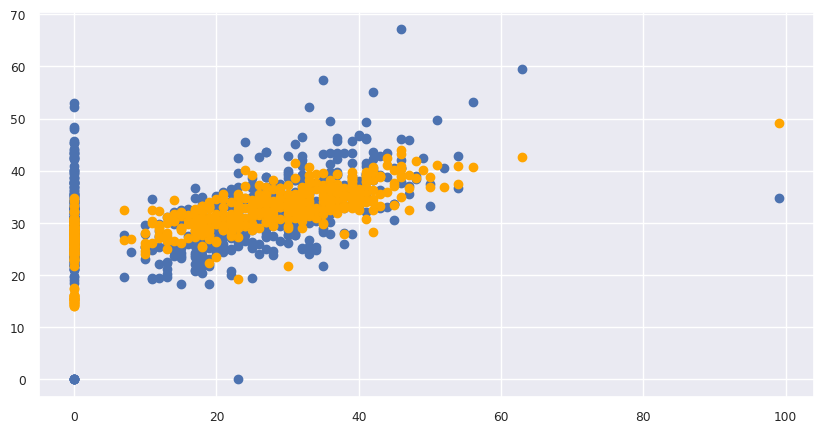

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(X_test['SkinThickness'], y_test, label='y_test')
plt.scatter(X_test['SkinThickness'], ry_preds, c='orange', label='ry_preds')

plt.show()

# 4. dense layer만 사용한 신경망으로 회귀를 수행

In [120]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats  # 과학용 계산 라이브러리

In [119]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

df = pd.read_csv("/content/drive/MyDrive/abalone.csv", index_col=0)
df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
id,,,,,,,,,
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9


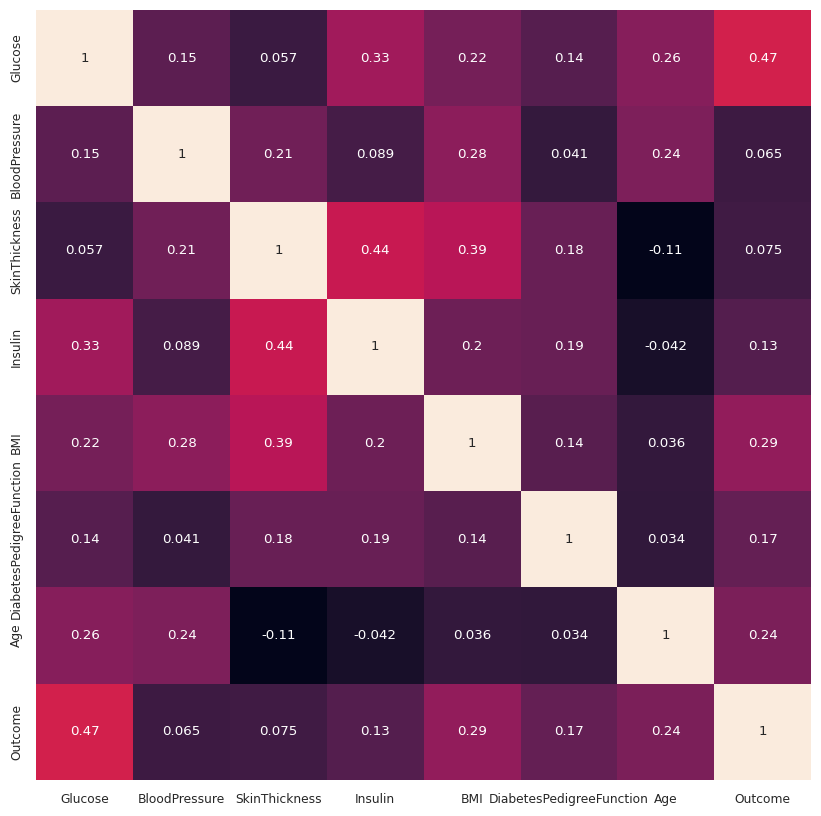

In [ ]:
#상관 관계 행렬
# 0.3 이상인 경우 상관관계가 있고, 0.7이상이면 아주 높음

df_corr=df.corr()

#히트맵
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

# BMI와 연관성이 높은 건  SkinThickness

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_42 (Dense)                     │ (None, 8)                   │              88 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_43 (Dense)                     │ (None, 30)                  │             270 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_44 (Dense)                     │ (None, 30)                  │             930 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_45 (Dense)                     │ (None, 1)                   │              31 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,319 (5.15 KB)

 Trainable params: 1,319 (5.15 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0771 - mse: 0.0771 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 2/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0015 - mse: 0.0015 - val_loss: 0.0029 - val_mse: 0.0029
Epoch 4/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0012 - mse: 0.0012 - val_loss: 7.7883e-04 - val_mse: 7.7883e-04
Epoch 5/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.9905e-04 - mse: 9.9905e-04 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 6/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.0379e-04 - mse: 8.0379e-04 - val_loss: 0.0032 - val_mse: 0.0032
Epoch 7/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8.7526e-04 - mse: 8.7526e-04 - val_loss: 7.7806e-04 - val_mse: 7.7806e-04
Epoch 8/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.4571e-04 - mse: 8.4571e-04 - val_loss: 7.1866e-04 - val_mse: 7.1866e-04
Epoch 9/10
79/79

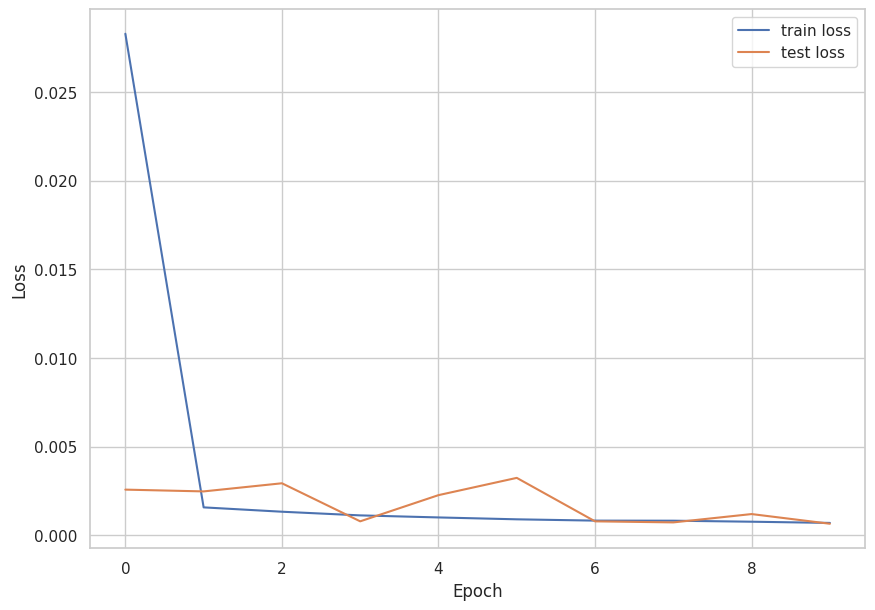

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7.4152e-04 - mse: 7.4152e-04 


[0.0007076759939081967, 0.0007076759939081967]

In [127]:
# #Defining the model
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error, r2_score
# from sklearn.model_selection import train_test_split
# from keras.models import Sequential
# from keras.layers import Dense
# from keras.optimizers import SGD,Adam
# from tensorflow.keras import layers

# X = df.drop('Rings',axis=1)
# X.head()
# y = df['Diameter']

# # 범주형 변수와 수치형 변수 구분 (Diameter 제외)
# categorical_features_diameter = ['Sex']
# numerical_features_diameter = ['Length', 'Height', 'Whole_weight', 'Shucked_weight', 'Viscera_weight', 'Shell_weight', 'Rings']

# # 전처리 파이프라인 설정
# preprocessor_diameter = ColumnTransformer(
#     transformers=[
#         ('num', StandardScaler(), numerical_features_diameter),  # 수치형 데이터 표준화
#         ('cat', OneHotEncoder(), categorical_features_diameter)  # 범주형 데이터 원핫 인코딩
#     ])


# X_processed_for_diameter = preprocessor_diameter.fit_transform(X_features)

# X_train_val, X_test, y_train_val, y_test = train_test_split(X_processed_for_diameter, y_regression_diameter, test_size=0.2, random_state=42)
# X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

# model = keras.Sequential([
#     layers.Dense(8,input_dim=X_train.shape[1],activation='tanh'),
#     layers.Dense(30,activation='tanh'),
#     layers.Dense(30,activation='tanh'),
#     layers.Dense(1)
# ])

# model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mse'])

# model.summary()


# N_EPOCHS = 10

# history=model.fit(x=X_train, y=y_train, epochs=40, batch_size=32,validation_data= (X_test,y_test))
# y_pred = model.predict(X_test)


# # loss 체크
# import matplotlib.pyplot as plt
# plt.figure(figsize=(10,7))
# plt.plot(range(N_EPOCHS), history.history['loss'], label='train loss')
# plt.plot(range(N_EPOCHS), history.history['val_loss'], label='test loss')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.legend()
# plt.show()

# model.evaluate(X_test, y_test)
# 필요한 라이브러리 임포트
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt

# 데이터 준비
X = df.drop('Diameter', axis=1)
y = df['Diameter']

# 범주형 변수와 수치형 변수 구분
categorical_features_diameter = ['Sex']
numerical_features_diameter = ['Length', 'Height', 'Whole_weight', 'Shucked_weight', 'Viscera_weight', 'Shell_weight', 'Rings']

# 전처리 파이프라인 설정
preprocessor_diameter = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features_diameter),  # 수치형 데이터 표준화
        ('cat', OneHotEncoder(), categorical_features_diameter)  # 범주형 데이터 원핫 인코딩
    ])

# 데이터 전처리
X_processed_for_diameter = preprocessor_diameter.fit_transform(X)

# 데이터를 훈련+검증 세트와 테스트 세트로 나누기
X_train_val, X_test, y_train_val, y_test = train_test_split(X_processed_for_diameter, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

# 모델 정의
model = Sequential([
    Dense(8, input_dim=X_train.shape[1], activation='tanh'),
    Dense(30, activation='tanh'),
    Dense(30, activation='tanh'),
    Dense(1)
])

# 모델 컴파일
model.compile(optimizer='rmsprop', loss='mse', metrics=['mse'])

# 모델 요약
model.summary()

# 학습을 위한 에포크 수 정의
N_EPOCHS = 10

# 모델 학습
history = model.fit(x=X_train, y=y_train, epochs=N_EPOCHS, batch_size=32, validation_data=(X_val, y_val))

# 테스트 세트로 예측 수행
y_pred = model.predict(X_test)

# 손실 체크를 위한 시각화
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['loss'], label='train loss')
plt.plot(range(N_EPOCHS), history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 모델 평가
model.evaluate(X_test, y_test)
